In [45]:
import pandas as pd
import json
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
arquivo = open("testeab-8de6a-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [3]:
for k,v in dados_fire["testeab-8de6a"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [4]:
lista_dicionarios = []

for k,v in dados_fire["testeab-8de6a"].items():
    lista_dicionarios.append(v)

        

In [5]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [6]:
dataframe

,tempo,tipo,user_id,versao
0,1479317170088,medio,3774183163,B
1,1479316754142,inicio,1952057959,B
2,1478528750150,medio,1321453813,B
3,1478263247180,inicio,2299771869,B
4,1478262997557,medio,931274072,A
5,1479317801677,medio,3774183163,A
6,1479317588148,medio,3774183163,B
7,1478263040099,final,931274072,B
8,1478524137539,inicio,2498306715,A
9,1478536958799,inicio,3771431033,A


In [7]:
agrupado = dataframe.groupby(by=["user_id", "versao"])

In [8]:
users = set(dataframe.user_id) # We convert it to a set so that each user appear only once

In [9]:
users = list(users) 

In [10]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="medio"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t1 = grupo1[grupo1.tipo=="medio"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                delta_t2 = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="medio"].iloc[0].tempo
                
                resultados.append({"user_id":u, "delta_t1":delta_t1, "delta_t2":delta_t2, "versao":versao})

In [11]:
grupo1.sort_values(by="tempo")

,tempo,tipo,user_id,versao
59,1478566685968,inicio,968803455,B


In [12]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

In [13]:
# Convertendo milissegundos em segundos
dataframe_resumo.delta_t1/=1000 
dataframe_resumo.delta_t2/=1000 

In [14]:
dataframe_resumo

,delta_t1,delta_t2,user_id,versao
0,8.994,6.859,1561760900,A
1,2.040,4.632,3141974280,A
2,2.100,9.034,3789181448,A
3,3.058,2.500,226968087,A
4,2.563,6.325,226968087,B
5,2.173,7.642,280871320,B
6,234.291,8.446,2498306715,A
7,5.733,7.979,3649128606,B
8,2.231,3.344,3946099743,A
9,2.551,20.987,3946099743,B


In [15]:
resultados_A=dataframe_resumo.query('versao == "A" and delta_t1 < 100 and delta_t1>0')
resultados_B=dataframe_resumo.query('versao == "B" and delta_t1 < 100 and delta_t1>0')
print(dataframe_resumo)
print(resultados_A)
print(resultados_B)

      delta_t1   delta_t2     user_id versao
0        8.994      6.859  1561760900      A
1        2.040      4.632  3141974280      A
2        2.100      9.034  3789181448      A
3        3.058      2.500   226968087      A
4        2.563      6.325   226968087      B
5        2.173      7.642   280871320      B
6      234.291      8.446  2498306715      A
7        5.733      7.979  3649128606      B
8        2.231      3.344  3946099743      A
9        2.551     20.987  3946099743      B
10      59.415     36.845  1154051230      A
11   57003.728  56962.655  3167377320      A
12       1.569      5.784   278835118      B
13       2.521      2.327  3187205062      A
14  968527.686      7.271  3187205062      B
15       3.453      5.745  2463145929      A
16       1.627      3.273   328675274      B
17       3.014      6.438   105061458      A
18       4.431      8.263  3309030230      B
19       2.120      3.238   931274072      A
20       4.028      4.649   931274072      B
21       4

[0, 60, 0, 5]

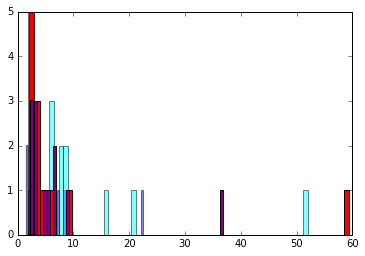

In [17]:
tempos_A2 = list(resultados_A[resultados_A.versao=="A"].delta_t2)
tempos_A1 = list(resultados_A[resultados_A.versao=="A"].delta_t1)
tempos_B1 = list(resultados_B[resultados_B.versao=="B"].delta_t1)
tempos_B2 = list(resultados_B[resultados_B.versao=="B"].delta_t2)
plt.hist(tempos_B1, bins=60, alpha=0.5,color="blue")
plt.hist(tempos_B2, bins=60, alpha=0.5, color="cyan")
plt.hist(tempos_A1, bins=60, color="red")
plt.hist(tempos_A2, bins=60, color="purple")

plt.axis([0,60,0,5])

[0, 60, 0, 5]

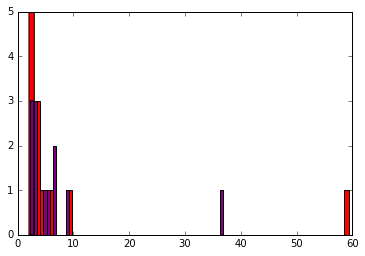

In [18]:
tempos_A2 = list(resultados_A[resultados_A.versao=="A"].delta_t2)
tempos_A1 = list(resultados_A[resultados_A.versao=="A"].delta_t1)
plt.hist(tempos_A1, bins=60, color="red")
plt.hist(tempos_A2, bins=60, color="purple")

plt.axis([0,60,0,5])

[0, 60, 0, 5]

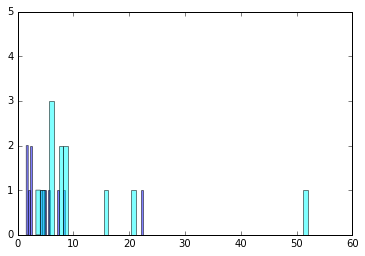

In [19]:
tempos_B1 = list(resultados_B[resultados_B.versao=="B"].delta_t1)
tempos_B2 = list(resultados_B[resultados_B.versao=="B"].delta_t2)
plt.hist(tempos_B1, bins=60, alpha=0.5,color="blue")
plt.hist(tempos_B2, bins=60, alpha=0.5, color="cyan")


plt.axis([0,60,0,5])

[0, 60, 0, 5]

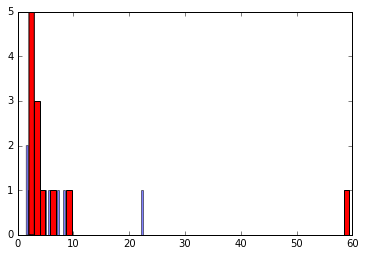

In [20]:
tempos_A1 = list(resultados_A[resultados_A.versao=="A"].delta_t1)
tempos_B1 = list(resultados_B[resultados_B.versao=="B"].delta_t1)
plt.hist(tempos_B1, bins=60, alpha=0.5,color="blue")
plt.hist(tempos_A1, bins=60, color="red")

plt.axis([0,60,0,5])

[0, 60, 0, 5]

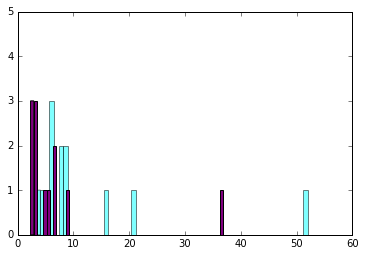

In [21]:
tempos_A2 = list(resultados_A[resultados_A.versao=="A"].delta_t2)
tempos_B2 = list(resultados_B[resultados_B.versao=="B"].delta_t2)
plt.hist(tempos_B2, bins=60, alpha=0.5, color="cyan")
plt.hist(tempos_A2, bins=60, color="purple")

plt.axis([0,60,0,5])

count    12.000000
mean      8.317833
std      16.223344
min       2.040000
25%       2.203250
50%       3.036000
75%       5.171000
max      59.415000
Name: delta_t1, dtype: float64

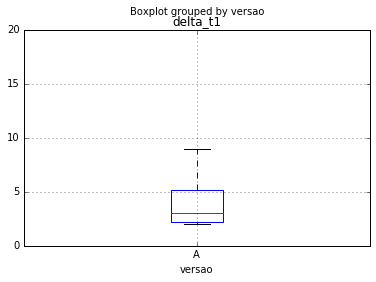

In [39]:
resultados_A.boxplot(column = "delta_t1", by = "versao")
plt.ylim(0, 20)
resultados_A.delta_t1.describe()

count    12.00000
mean      7.21800
std       9.56444
min       2.32700
25%       2.87800
50%       3.98800
75%       6.54325
max      36.84500
Name: delta_t2, dtype: float64

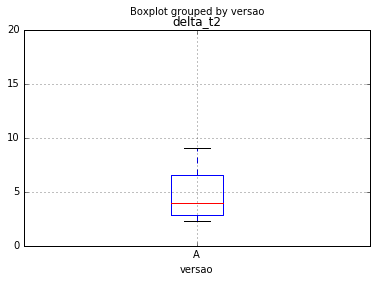

In [41]:
resultados_A.boxplot(column = "delta_t2", by = "versao")
plt.ylim(0, 20)
resultados_A.delta_t2.describe()

count    12.000000
mean      5.659833
std       5.756084
min       1.569000
25%       2.456500
50%       4.229500
75%       6.168250
max      22.510000
Name: delta_t1, dtype: float64

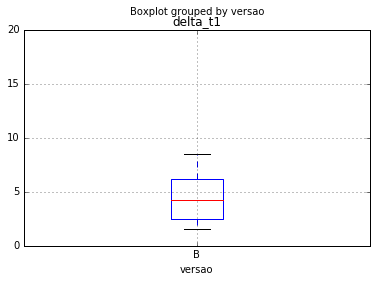

In [42]:
resultados_B.boxplot(column = "delta_t1", by = "versao")
plt.ylim(0, 20)
resultados_B.delta_t1.describe()


count    12.000000
mean     12.242000
std      13.465744
min       3.273000
25%       6.024000
50%       7.810500
75%      10.115250
max      52.041000
Name: delta_t2, dtype: float64

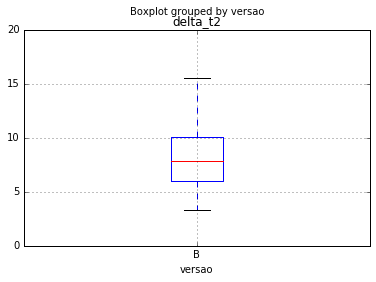

In [43]:
resultados_B.boxplot(column = "delta_t2", by = "versao")
plt.ylim(0, 20)
resultados_B.delta_t2.describe()

(array([ 0.00264811,  0.01115991,  0.03253398,  0.06752693,  0.11046421,
         0.17231661,  0.22036098,  0.24513976,  0.25327326,  0.23265579,
         0.18915105,  0.14016093,  0.08606373,  0.06015003,  0.03310143,
         0.0174019 ,  0.00983585,  0.00359387,  0.00226981,  0.00170236]),
 array([  3.86013 ,   4.388808,   4.917486,   5.446164,   5.974842,
          6.50352 ,   7.032198,   7.560876,   8.089554,   8.618232,
          9.14691 ,   9.675588,  10.204266,  10.732944,  11.261622,
         11.7903  ,  12.318978,  12.847656,  13.376334,  13.905012,
         14.43369 ]),
 <a list of 20 Patch objects>)

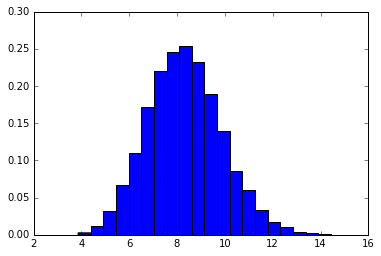

In [61]:
mediaA_t1 = []
for i in range(10000):
    mediaA_t1.append(np.mean(np.random.choice(resultados_A.delta_t1,size = 100)))
x_barra = pd.Series(mediaA_t1)
plt.hist(x_barra, bins = 20, normed = 1)

In [66]:
mediaA_t1 = pd.Series(mediaA_t1)
mediaA_t1.mean()

8.31506760300002

(array([ 0.00409825,  0.0132405 ,  0.03783001,  0.09835802,  0.17433329,
         0.27552856,  0.36663582,  0.41802159,  0.43315359,  0.38681183,
         0.32218557,  0.2411663 ,  0.16014703,  0.11002227,  0.05579926,
         0.02900301,  0.0119795 ,  0.0081965 ,  0.002522  ,  0.00346775]),
 array([  4.5111   ,   4.8283085,   5.145517 ,   5.4627255,   5.779934 ,
          6.0971425,   6.414351 ,   6.7315595,   7.048768 ,   7.3659765,
          7.683185 ,   8.0003935,   8.317602 ,   8.6348105,   8.952019 ,
          9.2692275,   9.586436 ,   9.9036445,  10.220853 ,  10.5380615,
         10.85527  ]),
 <a list of 20 Patch objects>)

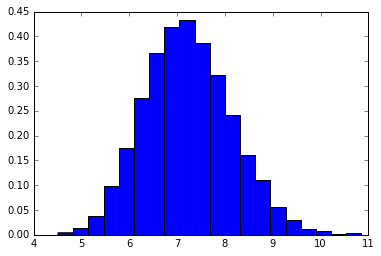

In [72]:
mediaA_t2 = []
for i in range(10000):
    mediaA_t2.append(np.mean(np.random.choice(resultados_A.delta_t2,size = 100)))
x_barra2 = pd.Series(mediaA_t2)
plt.hist(x_barra2, bins = 20, normed = 1)

In [73]:
mediaA_t2 = pd.Series(mediaA_t2)
mediaA_t2.mean()

7.227309643000002

(array([  6.88896594e-03,   1.60742539e-02,   7.30230390e-02,
          1.52475780e-01,   2.98062593e-01,   4.64316305e-01,
          6.29651487e-01,   7.20585838e-01,   6.61340731e-01,
          5.90614014e-01,   4.27575153e-01,   2.62699235e-01,
          1.50179458e-01,   6.93489238e-02,   4.68449684e-02,
          1.60742539e-02,   3.67411517e-03,   1.83705758e-03,
          9.18528792e-04,   4.59264396e-04]),
 array([ 3.91653  ,  4.1342695,  4.352009 ,  4.5697485,  4.787488 ,
         5.0052275,  5.222967 ,  5.4407065,  5.658446 ,  5.8761855,
         6.093925 ,  6.3116645,  6.529404 ,  6.7471435,  6.964883 ,
         7.1826225,  7.400362 ,  7.6181015,  7.835841 ,  8.0535805,  8.27132  ]),
 <a list of 20 Patch objects>)

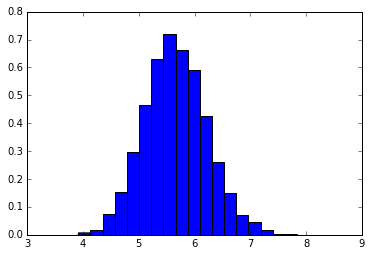

In [74]:
mediaB_t1 = []
for i in range(10000):
    mediaB_t1.append(np.mean(np.random.choice(resultados_B.delta_t1,size = 100)))
x_barra3 = pd.Series(mediaB_t1)
plt.hist(x_barra3, bins = 20, normed = 1)

In [75]:
mediaB_t1 = pd.Series(mediaB_t1)
mediaB_t1.mean()

5.6588002060000155

(array([  1.97483078e-04,   5.92449235e-04,   1.18489847e-03,
          1.00716370e-02,   2.84375633e-02,   7.03039758e-02,
          1.37448222e-01,   2.22168463e-01,   2.84968082e-01,
          3.05901288e-01,   3.00569245e-01,   2.26513091e-01,
          1.57591496e-01,   1.12170388e-01,   6.39845173e-02,
          2.96224617e-02,   1.32313662e-02,   7.30687389e-03,
          1.57986463e-03,   9.87415391e-04]),
 array([  7.26122  ,   7.7675925,   8.273965 ,   8.7803375,   9.28671  ,
          9.7930825,  10.299455 ,  10.8058275,  11.3122   ,  11.8185725,
         12.324945 ,  12.8313175,  13.33769  ,  13.8440625,  14.350435 ,
         14.8568075,  15.36318  ,  15.8695525,  16.375925 ,  16.8822975,
         17.38867  ]),
 <a list of 20 Patch objects>)

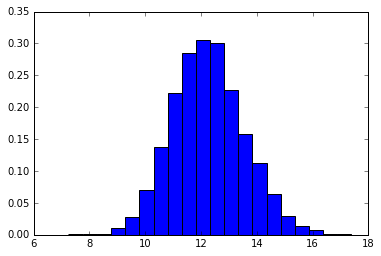

In [77]:
mediaB_t2 = []
for i in range(10000):
    mediaB_t2.append(np.mean(np.random.choice(resultados_B.delta_t2,size = 100)))
x_barra4 = pd.Series(mediaB_t2)
plt.hist(x_barra4, bins = 20, normed = 1)

In [78]:
mediaB_t2 = pd.Series(mediaB_t2)
mediaB_t2.mean()

12.25264759799997